# Deep Learning with TensorFlow

{{ badge }}

TensorFlow is an open-source library for deep learning that was developed by Google. It provides a flexible and powerful framework for building, training, and deploying deep learning models. TensorFlow also has a large and active community, which provides a wealth of resources and tutorials for learning and using the library.

In this notebook, we will be learning how to use TensorFlow to build and train deep learning models for climate change prediction. We will also be learning about regularization techniques and how they can be used to prevent overfitting and improve the generalization of deep learning models.

Helpful External Resources: 
* [TensorFlow Guides](https://www.tensorflow.org/guide)
* [TensorFlow Tutorials](https://www.tensorflow.org/tutorials)

## Table of Contents <a class="anchor" id="toc"></a>

* [Tensors](#tensors)
* [Layers](#layers)
* [Activation Functions](#activation-functions)
* [Models](#models)
* [Losses](#losses)
* [Optimizers](#optimizers)
* [Putting it All Together](#examples)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

## Tensors <a class="anchor" id="tensors"></a>
[Back to Top](#toc)


Tensors are the fundamental building blocks of TensorFlow. They are multi-dimensional arrays that can represent scalars, vectors, matrices, and higher-dimensional arrays of data. Tensors are similar to numpy arrays and can be used in similar ways, but they also have some unique features that make them well suited for deep learning.

In TensorFlow, tensors are used to represent the inputs and outputs of a model, as well as the model's parameters. They are also used to represent gradients, which are used in the training process. Tensors can be created, manipulated and transformed with a variety of functions provided by TensorFlow.

Let's take a look at how to create and manipulate tensors in TensorFlow

In [2]:
# create a tensor with shape (2,3) and filled with zeros
tensor_a = tf.zeros((2, 3))
print("Tensor A:\n", tensor_a, "\n")

# create a tensor with shape (2,3) and filled with ones
tensor_b = tf.ones((2, 3))
print("Tensor B:\n", tensor_b, "\n")

# create a tensor with shape (2,3) and filled with a constant value
tensor_c = tf.fill((3, 2), 4.0)
print("Tensor C:\n", tensor_c, "\n")

# create a tensor from a numpy array
numpy_array = np.array([[1, 2, 3], [4, 5, 6]])
tensor_d = tf.constant(numpy_array)
print("Tensor D:\n", tensor_d)

Tensor A:
 tf.Tensor(
[[0. 0. 0.]
 [0. 0. 0.]], shape=(2, 3), dtype=float32) 

Tensor B:
 tf.Tensor(
[[1. 1. 1.]
 [1. 1. 1.]], shape=(2, 3), dtype=float32) 

Tensor C:
 tf.Tensor(
[[4. 4.]
 [4. 4.]
 [4. 4.]], shape=(3, 2), dtype=float32) 

Tensor D:
 tf.Tensor(
[[1 2 3]
 [4 5 6]], shape=(2, 3), dtype=int64)


In [3]:
# addition of two tensors
addition = tf.add(tensor_a, tensor_b)
print("Tensor A + Tensor B:\n", addition, "\n")

# matrix multiplication of two tensors
# note that in matrix multiplication, the number of columns of the first matrix must be equal to the number of rows of the second matrix.
matmul = tf.matmul(tensor_b, tensor_c)
print("Tensor B . Tensor C:\n", matmul, "\n")

# transpose of a tensor
transpose = tf.transpose(tensor_d)
print("Tensor D Transposed:\n", transpose, "\n")

Tensor A + Tensor B:
 tf.Tensor(
[[1. 1. 1.]
 [1. 1. 1.]], shape=(2, 3), dtype=float32) 

Tensor B . Tensor C:
 tf.Tensor(
[[12. 12.]
 [12. 12.]], shape=(2, 2), dtype=float32) 

Tensor D Transposed:
 tf.Tensor(
[[1 4]
 [2 5]
 [3 6]], shape=(3, 2), dtype=int64) 



In [4]:
# get shape of a tensor
shape = tensor_a.shape
print("Tensor A Shape:", shape, "\n")

# get specific element of a tensor
element = tensor_d[1, 2]
print("Element at Tensor D index [1,2]:", element)

Tensor A Shape: (2, 3) 

Element at Tensor D index [1,2]: tf.Tensor(6, shape=(), dtype=int64)


## Layers <a class="anchor" id="layers"></a>
[Back to Top](#toc)


In TensorFlow, the `tf.keras` module provides a high-level API for building and training deep learning models. The `tf.keras.layers` module provides a variety of pre-built layers that can be used to construct neural networks. These layers are the building blocks of a neural network and can be combined to create complex architectures.

`tf.keras.layers.Dense` layer is used to create fully connected layers in a neural network. It takes in the number of units as an argument and creates that many neurons in the layer.


In [5]:
# create a dense layer with 4 units
dense_layer = tf.keras.layers.Dense(4)

# create a tensor with shape (2, 8) as input (2 input samples, each one with 8 features)
input_tensor = tf.random.normal([2, 8])

# pass the input tensor through the dense layer
output_tensor = dense_layer(input_tensor)

print("Output Tensor:", output_tensor)

Output Tensor: tf.Tensor(
[[ 0.05513961 -0.5339481   1.4474454  -0.7458242 ]
 [-0.25193113  0.12729234  0.7375244  -0.65112084]], shape=(2, 4), dtype=float32)


In [6]:
# access the weights of the dense layer
weights = dense_layer.weights

# print the shape of the weights, these weights are randomly initalized
print("Weights:", weights)  # Weights Shape: [(8, 4), (4,)]

Weights: [<tf.Variable 'dense/kernel:0' shape=(8, 4) dtype=float32, numpy=
array([[ 0.31018978, -0.14550912,  0.6132663 , -0.45733932],
       [-0.30899405, -0.2611437 , -0.02609718, -0.33450773],
       [ 0.10387498, -0.26177594,  0.2874294 , -0.05009168],
       [ 0.48014635,  0.07783931,  0.6510461 ,  0.2682925 ],
       [ 0.69828373, -0.41942048, -0.6542123 ,  0.2336461 ],
       [-0.45531914,  0.1473034 , -0.513004  ,  0.1597507 ],
       [-0.68696666,  0.24396586, -0.5050452 , -0.12076068],
       [ 0.07181603, -0.27238378, -0.5672283 , -0.53586835]],
      dtype=float32)>, <tf.Variable 'dense/bias:0' shape=(4,) dtype=float32, numpy=array([0., 0., 0., 0.], dtype=float32)>]


## Activation Functions <a class="anchor" id="activation-functions"></a>
[Back to Top](#toc)

Activation functions are an important component of neural networks and are used to introduce non-linearity into the model. They are applied element-wise to the output of a layer and are used to introduce non-linearity into the model. Activation functions are used to introduce non-linearity because a neural network composed of only linear layers would be equivalent to a linear model, which is not expressive enough to model complex patterns in data.

Some common activation functions used in neural networks are:

**ReLU (Rectified Linear Unit)**: ReLU is one of the most widely used activation functions. It is computationally efficient, easy to implement and does not saturate for positive values of x. It is mainly used in the hidden layers of neural networks.

Code: `tf.nn.relu`

Math: $f(x) = max(0, x)$


**Sigmoid**: Sigmoid function maps the input to a value between 0 and 1. It is mainly used in the output layer of binary classification problems to get a probability value.

Code: `tf.nn.sigmoid`

Math: $f(x) = \frac{1}{1 + e^{-x}}$


**Tanh (Hyperbolic Tangent)**: The tanh function maps the input to a value between -1 and 1. It is similar to sigmoid function but it is zero-centered, which means it has negative values as well. It is mainly used in the hidden layers of neural networks.

Code: `tf.nn.tanh`

Math: $f(x) = \frac{1}{1 + e^{-x}}$


**Softmax**: The softmax function is mainly used in the output layer of multi-class classification problems to get a probability distribution over the classes.

Code: `tf.nn.softmax`

Math: $f(x_i) = \frac{e^{x_i}}{\sum(e^{x_j})}$


In [7]:
# create a dense layer with 4 units
dense_layer_w_activation = tf.keras.layers.Dense(4, activation=tf.nn.relu)

# pass the input tensor through the dense layer
output_tensor = dense_layer_w_activation(input_tensor)

print(
    "Output Tensor:", output_tensor
)  # note that some of the outputs are zeros because we used ReLU

Output Tensor: tf.Tensor(
[[0.2585567  0.         0.         0.37567353]
 [0.19427118 2.1795511  1.9128449  0.        ]], shape=(2, 4), dtype=float32)


## Models <a class="anchor" id="models"></a>
[Back to Top](#toc)

In TensorFlow with Keras, we can stack multiple layers together to create a sequential model by using the `tf.keras.Sequential` class. This class allows us to create a linear stack of layers, where the output of one layer is used as the input for the next layer.

When building models in TensorFlow with Keras, the way we build the model will depend on the type of output we are trying to predict. Here are some guidelines on how to build a model for different types of outputs:

* Binary Classification: When the output is binary, it means that there are only two possible outcomes, such as true or false, yes or no, etc. In this case, the last layer of the model should be a single sigmoid neuron, which will output a value between 0 and 1, representing the probability of the positive class.

* Multinomial Classification: When the output is multinomial, it means that there are more than two possible outcomes, such as red, green, blue, etc. In this case, the last layer of the model should be a softmax layer, which will output a probability distribution over the classes.
* Regression: When the output is a single continuous value, such as a price, temperature, etc. In this case, the last layer of the model should be a single neuron with no activation function.

In [8]:
# create an empty sequential model
model = tf.keras.Sequential(
    [
        # specify the dimension of the input, in this case it's a vector of 8 feautres
        tf.keras.layers.Input(shape=(8,)),
        # a dense layer with 4 units and ReLU activation
        tf.keras.layers.Dense(4, activation=tf.nn.relu),
        # a dense layer with 1 units and sigmoid activation
        tf.keras.layers.Dense(1, activation="sigmoid"),
    ]
)

# Print the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 4)                 36        
                                                                 
 dense_3 (Dense)             (None, 1)                 5         
                                                                 
Total params: 41
Trainable params: 41
Non-trainable params: 0
_________________________________________________________________


In [9]:
# pass the input tensor through the whole model
model_output = model.predict(input_tensor)

print(
    "Model Outputs:", model_output
)  # notice that the output for each sample is a single number between 0 and 1 because we used Sigmoid

1/1 [==============================] - 0s 252ms/step
Model Outputs: [[0.9021145 ]
 [0.74977976]]


## Losses <a class="anchor" id="losses"></a>
[Back to Top](#toc)

A loss function is a function that measures the difference between the predicted output and the actual output. The goal of training a neural network is to minimize the loss function. There are several loss functions available in TensorFlow, and the appropriate loss function to use depends on the type of output and use case.

Here are some commonly used loss functions in TensorFlow, along with the appropriate output type and use case:

* **Binary Cross-Entropy**: This loss function is used for binary classification problems, where the output is a probability of one class. It is calculated as the negative log likelihood of the true labels given the predicted labels. In TensorFlow, the `tf.losses.BinaryCrossentropy` class can be used to calculate binary cross-entropy loss.

* **Categorical Cross-Entropy**: This loss function is used for multi-class classification problems, where the output is a probability distribution over multiple classes. It is calculated as the negative log likelihood of the true labels given the predicted labels. In TensorFlow, the `tf.losses.CategoricalCrossentropy` class can be used to calculate categorical cross-entropy loss.

* **Mean Absolute Error (MAE)**: This loss function is also used for regression problems, where the output is a single continuous value. It is calculated as the average of the absolute differences between the predicted values and the true values. In TensorFlow, the `tf.losses.MeanAbsoluteError` class can be used to calculate mean absolute error loss.

* **Huber Loss**: This loss function is also used for regression problems, it is a combination of both MAE and MSE. It's less sensitive to outliers than MSE. In TensorFlow, the `tf.losses.Huber` class can be used to calculate Huber loss.


## Optimizers <a class="anchor" id="optimizers"></a>
[Back to Top](#toc)

An optimizer is an algorithm used to update the model's parameters in order to minimize the loss function. There are several optimizers available in TensorFlow, and the appropriate optimizer to use depends on the specific problem and use case.

Here are some commonly used optimizers in TensorFlow, along with a brief explanation of how they work:

* **Stochastic Gradient Descent (SGD)**: This is a simple optimization algorithm that updates the model's parameters based on the gradient of the loss function with respect to the parameters. It is computationally efficient and easy to implement, but can be sensitive to the learning rate and may get stuck in local minima.
* **Adagrad**: This optimizer adapts the learning rate for each parameter based on the historical gradient information. The learning rate is increased for parameters that receive small gradients and decreased for parameters that receive large gradients. This can help the optimizer to converge faster and more efficiently, but can also lead to the learning rate becoming very small for some parameters and slowing down the convergence.
* **Adam (Adaptive Moment Estimation)**: Adam is an optimization algorithm that combines the ideas of momentum and Adagrad. It uses an adaptive learning rate for each parameter, similar to Adagrad, but also takes into account the previous updates, similar to momentum. This allows Adam to converge faster and more efficiently than other optimizers, making it a popular choice for deep learning tasks.


## Putting it all together <a class="anchor" id="example"></a>
[Back to Top](#toc)

Putting everything together, building a deep learning model with TensorFlow involves several steps. First, we need to prepare the data by loading it and preprocessing it as needed. Then we need to define the model architecture, including the input layer, hidden layers, and output layer, along with the appropriate activation functions for each layer. We also need to define the loss function and optimizer to be used for training.



In [10]:
# Load and preprocess the data
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

x_train.shape, y_train.shape, x_test.shape, y_train.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (60000,))

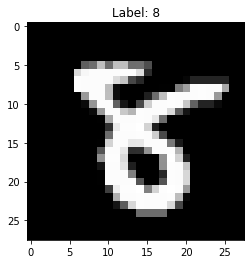

In [11]:
# Pick a random image index
index = np.random.randint(0, x_train.shape[0])

# Plot the image
plt.imshow(x_train[index], cmap="gray")
plt.title("Label: " + str(y_train[index]))
plt.show()

In [12]:
# reshape the data to be in the format (batch_size, input_dim) because Dense layers require one dimensional input
x_train = x_train.reshape(-1, 28 * 28)
x_test = x_test.reshape(-1, 28 * 28)

x_train.shape, x_test.shape

((60000, 784), (10000, 784))

In [13]:
# Normalize the data
x_train = x_train / 255.0
x_test = x_test / 255.0

In [14]:
# convert the labels from integers to categorical using one hot encoding
depth = len(set(y_train))  # calculate the number of classes to use as depth
y_train = tf.one_hot(y_train, depth=depth)
y_test = tf.one_hot(y_test, depth=depth)

y_train.shape, y_test.shape

(TensorShape([60000, 10]), TensorShape([10000, 10]))

In [21]:
# fetch the input shape, i.e. the number of features
input_shape = x_train.shape[1]  # input_shape = 784

model = tf.keras.Sequential(
    [
        # input layer
        tf.keras.layers.Input(shape=(input_shape)),
        # hidden layers
        tf.keras.layers.Dense(256, activation="relu"),
        tf.keras.layers.Dense(128, activation="relu"),
        # output layer
        tf.keras.layers.Dense(10, activation="softmax"),
    ]
)

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 256)               200960    
                                                                 
 dense_11 (Dense)            (None, 128)               32896     
                                                                 
 dense_12 (Dense)            (None, 10)                1290      
                                                                 
Total params: 235,146
Trainable params: 235,146
Non-trainable params: 0
_________________________________________________________________


In [19]:
loss_fn = tf.losses.CategoricalCrossentropy()
optimizer = tf.optimizers.Adam(learning_rate=0.001)
metrics = [tf.keras.metrics.CategoricalAccuracy()]

# Compile the model
model.compile(optimizer=optimizer, loss=loss_fn, metrics=metrics)

In [20]:
model.fit(x_train, y_train, batch_size=32, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.2043 - categorical_accuracy: 0.9399 - val_loss: 0.1031 - val_categorical_accuracy: 0.9667
Epoch 2/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0857 - categorical_accuracy: 0.9734 - val_loss: 0.0970 - val_categorical_accuracy: 0.9703
Epoch 3/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0604 - categorical_accuracy: 0.9811 - val_loss: 0.0776 - val_categorical_accuracy: 0.9769
Epoch 4/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0454 - categorical_accuracy: 0.9858 - val_loss: 0.0729 - val_categorical_accuracy: 0.9786
Epoch 5/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0350 - categorical_accuracy: 0.9888 - val_loss: 0.0891 - val_categorical_accuracy: 0.9742
Epoch 6/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0292 - categorical_accuracy: 0.9899 - val_loss: 0.0819 - val_categorical_acc